# Рынок заведений общественного питания Москвы

<br/>
    
<div class="alert alert-info">
<h2> Привет!<a class="tocSkip"></h2>
<hr>  
Я - Сергей. Рад что ты читаешь это текст :) Сделаю пару ремарок общего характера. В описании выполняемых действий, комментариях, я использую местоимение 'мы', так как считаю что ты - ревьювер, проверя код становиться моим соучастником ('соучавствующие программирование') и мы вместе проходим по пути исследования. Да и сформировлась привычка так писать в ходе написания научных работ.   
NB! - так помечаю важные на мой взгдял идеи, которые стоит взять на заметку; инсайты, проработка которых требует большего знания предметной области.   
Надеюсь мои многословные комментарии тебя не утомят.    
</div>
    
<br/>

# Оглавление

[1  Описание проекта](#description)    
[2  Загрузка, предобработка и исследовательский анализ данных](#preparing)    
[3  Анализ данных](#analysis)    
[3.1  Соотношение типов объектов общественного питания по количеству](#type)    
[3.2  Соотношение сетевых и несетевых заведений по количеству](#network)    
[3.3  Среднее количество посадочных мест](#avg)    
[3.4  География московского общепита](#geo)    
[4  Вывод](#summary)    
[5  Презентация](#presentation)

## Описание проекта  <a id="description"></a>

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?   

**Описание данных** 

Таблица rest_data:   
**id** — идентификатор объекта;   
**object_name** — название объекта общественного питания;  
**chain** — сетевой ресторан;  
**object_type** — тип объекта общественного питания;  
**address** — адрес;  
**number** — количество посадочных мест.  

---

## Загрузка, предобработка и исследовательский анализ данных <a id="preparing"></a>

In [ ]:
# Загрузим необходимые библиотеки
!pip install plotly.express
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import re # Для работы с регулярными выражениями

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Загрузим данные в датафрейм rest_data
# Импорт библиотек
from io import BytesIO
import requests
spreadsheet_id = '1LOF07PD14C8CeqdCGhDCxdlxGjcz6khslpUro8Ij8IM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rest_data = pd.read_csv(BytesIO(r.content))
display(rest_data.head()) # Выведим первые 5 строк датасета

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
rest_data.info() #Изучим данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [ ]:
# Проверим дубликаты
rest_data[rest_data.duplicated()].count()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [ ]:
# Код ревьюера

rest_data[rest_data.drop('id', axis=1).duplicated(keep=False)].sort_values(by='object_name')

,id,object_name,chain,object_type,address,number
2869,25031,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
13858,209723,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5069,20025,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5067,20023,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
...,...,...,...,...,...,...
14119,222452,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, улица Сущёвский Вал, дом 5, стро...",1
10750,173706,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, Бескудниковский бульвар, дом 12",0
11520,183275,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 14, корпус...",0
14376,217108,Шурма,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 25А",0


**Выводы 1:**   
* В датафремем 15366 записей (наблюдений) и 6 колонок.  
* Пропущенных значений нет.   
* Типы данных в колонках соответствуют содержащихся в них данным.  
* Заглавия колонок соотвествуют "хорошему тону".  
* Дублирующих записей (дубликатов) - нет.

In [ ]:
# Посмотрим уникальные значений в каждой из колонок, кроме id - где все значений уникальны
rest_data['object_name'].value_counts()

Столовая                   267
Кафе                       236
Шаурма                     234
KFC                        155
Шоколадница                142
                          ... 
Столовая ТЦ «Энтузиаст»      1
Охунова У.Д.                 1
СОК ООО АВТОКОМБИНАТ 3       1
АВТОКОМБИНАТ 3               1
Кальянная «Мята Lounge»      1
Name: object_name, Length: 10393, dtype: int64

In [ ]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [ ]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [ ]:
rest_data['address'].value_counts()

город Москва, Ходынский бульвар, дом 4                     95
город Москва, Пресненская набережная, дом 2                63
город Москва, проспект Мира, дом 211, корпус 2             60
город Москва, Кировоградская улица, дом 13А                53
город Москва, площадь Киевского Вокзала, дом 2             48
                                                           ..
город Москва, проспект Мира, дом 87                         1
город Москва, Новомосковская улица, дом 15А, строение 1     1
город Москва, улица Кондратюка, дом 5                       1
город Москва, 1-я Останкинская улица, дом 29                1
город Москва, улица Новый Арбат, дом 13                     1
Name: address, Length: 9108, dtype: int64

In [ ]:
rest_data['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
229       1
356       1
481       1
167       1
119       1
Name: number, Length: 315, dtype: int64

In [ ]:
rest_data['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

**Выводы 2:**  
* У московского общепита популярны родовые названия  "Столовая", "Кафе" и "Шаурма", или названия, относящие заведения к известным сетям  - KFC и "Шоколадница" (видимо эти сети самые обширные).  
* Сетевых заведений в почти в 4,2 раза меньше чем несетевых.  
* Наиболее распрастранённые типы заведений это кафе, столовая, ресторан и фастфуд (предпряития бысторого питания). 
* В Москве есть огоромные гастроклатеры, в основном это торгово-развлекательные центры:  
в ТРЦ "Авапарк" (Ходынский бульвар, дом 4) 95 заведений общепита,    
в ТРЦ "Афимолл Сити" (Пресненская набережная, дом 2) - 63,  
в ТЦ "Европолис" (проспект Мира, дом 211, корпус 2) - 60,   
в ТРЦ Columbus (Кировоградская улица, дом 13А) - 53,  
в ТРЦ "Европейский" (площадь Киевского Вокзала, дом 2) - 48.  
* Больше число заведений не имеют посадочных мест - еда на вынос. Средние число посадочных мест - 59.55, медианное (что вернее) - 40. Максимальное  - 1700 .



---

## Анализ данных  <a id="analysis"></a>

### Соотношение типов объектов общественного питания по количеству<a id="type"></a>

In [ ]:
# Сгруппируем данные по типам объектов общепита
# и построим столбчатую диаграмму по данным сгруппированым типам объектов общепита
object_type_fig = px.bar(rest_data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False),
                y='id', # зададим ось Y 
                x='object_type', # зададим ось Х 
                text='id', # зададим подписи данных 
                title='Количество объектов по типу заведения',  # зададим заголовок диаграммы 
                labels={'id':'Количество объектов, ед.','object_type':'Тип объекта'}) # зададим подписи осей 
object_type_fig.update_yaxes(range=[0, 7000])
object_type_fig.update_traces(textposition="outside")


object_type_fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=rest_data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False)['object_type'],
        ticktext=rest_data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False)['object_type'].apply(lambda x : '<br>'.join(x.split()))
    )
)

object_type_fig.show()

**Вывод:** Наиболее распрастранённые типы заведений это кафе, столовая, ресторан и фастфуд (предприятия бысторого питания).

 ### Соотношение сетевых и несетевых заведений по количеству<a id="network"></a>   
    
1. Для какого вида объекта общественного питания характерно сетевое распространение?   
1. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?   

In [ ]:
# Заменим "да" и "нет" в описание относится ли заведение к сетям, соответсвенно на "сетевые" и "несетевые" 
# использовав метод .map
new_name = {'да': 'сетевые', 'нет': 'несетевые'}
rest_data['chain'] = rest_data['chain'].map(new_name)
rest_data['chain'].value_counts()

несетевые    12398
сетевые       2968
Name: chain, dtype: int64

In [ ]:
# Построим столбчатую диаграмму по данным сгруппированым по принадлежности к сетям
chain_fig_bar = px.bar(rest_data.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False),
                y='id', # зададим ось Y
                x='chain', # зададим ось Х 
                text='id', # зададим подписи данных
                color = 'chain',       
                title='Количество объектов по типу заведения', # зададим заголовок диаграммы
                labels={'id':'Количество объектов, ед.','chain':'Тип'}) # зададим подписи осей
chain_fig_bar.update_yaxes(range=[0, 13200])
chain_fig_bar.update_traces(textposition="outside")
chain_fig_bar.show()

In [ ]:
# Построим круговую диаграмму по данным сгруппированым по принадлежности к сетям
chain = rest_data.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False)
chain_fig_pie = go.Figure(data=[go.Pie(labels=chain['chain'], values=chain['id'])])
chain_fig_pie.update_layout(legend_orientation="h")
chain_fig_pie.show() 

**Вывод** Сетевых заведений 2968 (19.3% от ообщего числа), несетевых - 12398 (80.7%), то есть в 4,2 раза меньше.

In [ ]:
# Определим для какого типа объектов общественного питания характерно сетевое распространение
# Создадим сводную таблицу 
grouped_chain = rest_data.pivot_table(values = 'object_name', index='object_type', columns=['chain'], aggfunc='count').reset_index()

# Расчитаем долю (ratio) сетевых заведений в каждом из типов 
grouped_chain['ratio'] = (grouped_chain['сетевые']/(grouped_chain['сетевые']+grouped_chain['несетевые'])*100).round(1)

# Построим столбчатую диаграмму 
grouped_chain_fig = px.bar(grouped_chain.sort_values(by='ratio', ascending=False),
                y='ratio',
                x='object_type',
                text='ratio',
                title='Доля сетевых заведений по типам заведений',
                labels={'ratio':'Доля сетевых заведений, %', 'object_type':'Тип объекта'})
grouped_chain_fig.update_yaxes(range=[0, 45])
grouped_chain_fig.update_traces(textposition="outside")
grouped_chain_fig.show()

In [ ]:
# Код ревьюера

rest_data.groupby('object_type').agg({'chain' : lambda x : (x == 'сетевые').mean()})

,chain
object_type,
бар,0.043224
буфет,0.018803
закусочная,0.155556
кафе,0.228890
кафетерий,0.130653
магазин (отдел кулинарии),0.285714
предприятие быстрого обслуживания,0.411336
ресторан,0.238074
столовая,0.001160


**Вывод** Выше всего доля сетевых завдений в фастфуде, кулинарии, ресторанах и кафе. Столовые, буфеты и бары, напротив в подовляющим большинстве - несетевые заведений.

In [ ]:
# Сделаем срез данных, включающий только сетевые заведения
network_catering_enterprises = rest_data.query("chain == 'сетевые'")

# На его основе построим сводную таблицу где расчитаем для каждой из сетей 
# число заведений и среднее число посадочных мест
network_catering_enterprises = network_catering_enterprises.pivot_table(
                               index='object_name', 
                               values=['id', 'number'],
                               aggfunc={'id': 'count', 'number': 'mean'}).sort_values(by='id', ascending=False).reset_index() 

print('Максимальное число заведений', network_catering_enterprises['id'].max())
print('Максимальное количество посадочных мест', network_catering_enterprises['number'].max())
display(network_catering_enterprises)

Максимальное число заведений 155
Максимальное количество посадочных мест 356.0


,object_name,id,number
0,KFC,155,55.341935
1,Шоколадница,141,56.170213
2,Макдоналдс,122,81.500000
3,Бургер Кинг,122,45.016393
4,Домино'с Пицца,86,18.209302
...,...,...,...
719,Кафе «Марукамэ»,1,40.000000
720,Кафе «МЕЛЕНКА»,1,60.000000
721,Кафе «МАКДОНАЛДС»,1,40.000000
722,Кафе «Кулинарное бюро»,1,18.000000


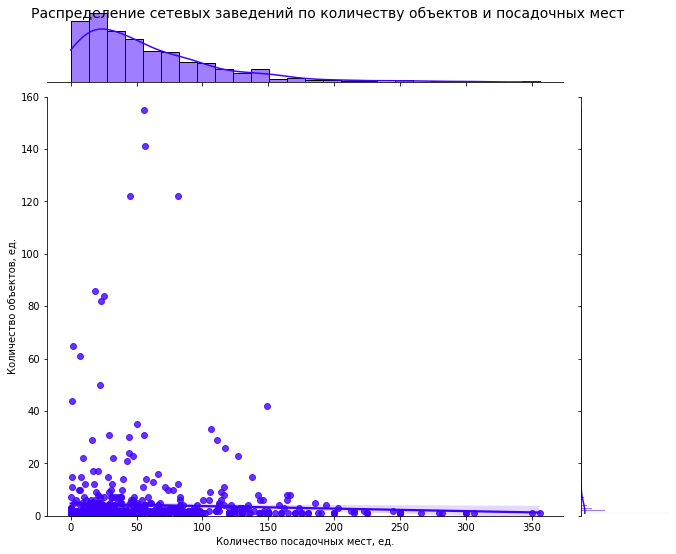

In [ ]:
# Постоим Joint plot , чтобы совместить  на одном графике распереление числа завдений и посадочных мест
nce_fug = sns.jointplot(x='number', y='id', data=network_catering_enterprises, color='#4000ff', kind='reg')
nce_fug.fig.set_figwidth(10)
nce_fug.fig.set_figheight(8)
nce_fug.fig.suptitle('Распределение сетевых заведений по количеству объектов и посадочных мест', fontsize=14)

nce_fug.set_axis_labels('Количество посадочных мест, ед.','Количество объектов, ед.', fontsize=10 )
plt.xlim(0,360)
plt.ylim(0,160)
plt.show()

**Вывод** Среди московских сетевых заведений общественного питания преобладают сети с небольшим числом объектов (до 10) и небольшим количеством посадочных мест (20-50). Заведения с большим количеством объектов обладают небольшой вместимостью (40-70 мест)

Разобъём все сети на группы:   
* мало заведений / мало мест  
* мало заведений / много мест  
* много заведений/ мало мест  
* много заведений/много мест  
Чтобы определить сколько счистать "мало" и "много" посмотрим на квартили и перцентили

In [ ]:
print('3/4 сетей состят из',np.percentile(network_catering_enterprises['id'], [75]), 'заведений')

3/4 сетей состят из [2.] заведений


In [ ]:
# Чтото 75% совсем мало завдений имеют - 2 это не сеть, в моём понимании, посмотрим на 95%
print('95% сетей состят из',np.percentile(network_catering_enterprises['id'], [95]), 'заведений')

95% сетей состят из [12.] заведений


In [ ]:
print('3/4 сетей имеют', np.percentile(network_catering_enterprises['number'], [75]), 'посадочных мест/-а')

3/4 сетей имеют [83.625] посадочных мест/-а


In [ ]:
# 83 долеко отсредлнего, посмотрим медиану
print('Половина сетей имеют', np.percentile(network_catering_enterprises['number'], [50]), 'посадочных мест/-а')

Половина сетей имеют [45.] посадочных мест/-а


По числу заведений отсечку мало/ много устновим на уровне 12 заведений, по числу посадочных мест - 45 мест.  
Напишим функцию, которая будет примвивать категиорию в новый столбец датафрейма network_catering_enterprises

In [ ]:
def number (i):
    object_count = i['id']
    number_count=i['number']
    if object_count < 12 and number_count < 45:
            return 'мало заведений / мало мест'
    if object_count < 12 and number_count >= 45:
            return 'мало заведений / много мест'
    if object_count >=12 and number_count < 45:
            return 'много заведений/ мало мест'
    if object_count >=12 and number_count >= 45:
            return 'много заведений/много мест'
    
network_catering_enterprises['category'] = network_catering_enterprises.apply(number, axis = 1)
display(network_catering_enterprises.head())

,object_name,id,number,category
0,KFC,155,55.341935,много заведений/много мест
1,Шоколадница,141,56.170213,много заведений/много мест
2,Макдоналдс,122,81.500000,много заведений/много мест
3,Бургер Кинг,122,45.016393,много заведений/много мест
4,Домино'с Пицца,86,18.209302,много заведений/ мало мест


In [ ]:
category = network_catering_enterprises.groupby('category').agg({'category':'count'})
display(category)

,category
category,
мало заведений / мало мест,331
мало заведений / много мест,353
много заведений/ мало мест,23
много заведений/много мест,17


**Вывод** В большинстве своём московский сетевой общепит представлен двумя типами сетей:   
* размером до 12 заведений, со средним числом посадочных мест менее 45 посадочных мест и   
* размером до 12 заведений, со средним числом посадочных мест более 45 посадочных мест.   
Но, в обоих случаясх это сети до 12 завеъдений - в нашем понимании небольшие.

### Среднее количество посадочных мест<a id="avg"></a>  
Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [ ]:
# Посчитаем среднее число посадочных мест по типу завдения
avg_number_type = rest_data.pivot_table(index='object_type', values='number',
                        aggfunc= {'number': 'mean'}).sort_values(by=('number'), ascending=False).reset_index()
avg_number_type['number'] = avg_number_type['number'].round(1)
display(avg_number_type)

,object_type,number
0,столовая,130.2
1,ресторан,96.8
2,буфет,51.1
3,бар,43.5
4,кафе,39.7
5,предприятие быстрого обслуживания,20.6
6,кафетерий,9.1
7,закусочная,7.6
8,магазин (отдел кулинарии),5.6


In [ ]:
# Посторим диаграмму по этим данным
avg_number_type = avg_number_type.sort_values(by=('number'), ascending=True)
avg_number_fig = px.bar(avg_number_type, 
             x='number', 
             y='object_type',
             text='number',      
             title='Среднее число посадочных мест',
             labels={'number':'Число посадочных мест, ед.', 'object_type':'Тип объекта'}
                       )
avg_number_fig.update_xaxes(range=[0, 140])
avg_number_fig.update_traces(textposition="outside")
avg_number_fig.update_xaxes(tickangle=0)
avg_number_fig.show() 

**Вывод** Больше всего среднее число посадочных мест у столовых и ресторанов, далее - буфеты и бары, за ними следуют кафе

### География московского общепита <a id="geo"></a>    
1. Выделите в отдельный столбец информацию об улице из столбца address.   
1. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?  
1. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

#### Выделение адреса

In [ ]:
# Выделим адрес, для этого используем рещгулярные выражений - будем искать по родовому имени (улица, аллея, переулок и т.д.)
# Типы улиц взяты с http://mosopen.ru/streets
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'просек']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[$|,]+".format('|'.join(words))

rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)

display(rest_data)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,несетевые,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,несетевые,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,несетевые,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сетевые,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,несетевые,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевые,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,сетевые,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,сетевые,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,сетевые,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


#### Топ-10 улиц по числу заведений

In [ ]:
# Подсчитаем количество объектов на каждой улице и отсортируем по убыванию числа объектов
street_object_count = (rest_data.groupby(['street'])
                    .agg({'object_name':'count'})
                    .sort_values(by='object_name', ascending=False)
                    .reset_index()
                   )
street_object_count.rename(columns={'object_name' : 'object_count'}, inplace = True)
# Возмём топ-10 улиц
street_top_10 = street_object_count.head(10)
display(street_top_10)

,street,object_count
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [ ]:
street_top_10 = street_top_10.sort_values(by=('object_count'), ascending=True)
fig = px.bar(street_top_10, 
             x='object_count', 
             y='street',
             text='object_count',
             title='Топ-10 улиц по числу заведений',
             labels={'object_count':'Число заведений, ед.', 'street':'Улица'}
)
fig.update_xaxes(range=[0, 220])
fig.update_traces(textposition="outside")
fig.update_xaxes(tickangle=0)
fig.show() 

**Вывод** Самая "населённая" заведениями улица Москвы - проспект Мира

**ЗАГРУЗКА ДАННЫХ ИЗ ВНЕШНИХ ИСТОЧНИКОВ!**  
1. Нашёл в Интернете список всех улиц Москвы и их привязка к районам с сайта МосГаз https://frs.noosphere.ru/xmlui/handle/20.500.11925/714058?show=full   
1. Загрузил csv-файл в гугл-диск, оттуда мы его и прочитаем.

In [ ]:
# Импорт библиотек
spreadsheet_id = '1o0Rmxii5snYG8fk0Q81p9D5F9bZyslSPOGci7lpQ1Po'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
display(moscow_streets.head())

,streetname,areaid,okrug,area
0,Выставочный переулок,17.0,ЦАО,Пресненский район
1,улица Гашека,17.0,ЦАО,Пресненский район
2,Большая Никитская улица,17.0,ЦАО,Пресненский район
3,Глубокий переулок,17.0,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17.0,ЦАО,Пресненский район


**Описание данных:**  
**streetname** - название улицы    
**areaid** - код района   
**okrug** - название округа   
**area** - район

In [ ]:
moscow_streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4432 entries, 0 to 4431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   streetname  4432 non-null   object 
 1   areaid      4397 non-null   float64
 2   okrug       4431 non-null   object 
 3   area        4431 non-null   object 
dtypes: float64(1), object(3)
memory usage: 138.6+ KB


In [ ]:
moscow_streets[moscow_streets.duplicated()].count()

streetname    8
areaid        8
okrug         8
area          8
dtype: int64

In [ ]:
moscow_streets = moscow_streets.drop_duplicates().reset_index(drop=True)
moscow_streets[moscow_streets.duplicated()].count()

streetname    0
areaid        0
okrug         0
area          0
dtype: int64

Датафрейм содержит данные о 4424  московских улицах. Пропусков нет. Типы данных в порядке. Были дубликаты.

In [ ]:
# Объеденим таблицу с топ-10 улицами с данными о районе и округе
moscow_streets.rename(columns={'streetname':'street'}, inplace = True) # Для объеденения будем использовать поле street
street_top_10 = street_top_10.merge(moscow_streets, on='street', how='left') 
display(street_top_10)

,street,object_count,areaid,okrug,area
0,Кировоградская улица,110,109.0,ЮАО,Район Чертаново Центральное
1,Кировоградская улица,110,108.0,ЮАО,Район Чертаново Северное
2,Кировоградская улица,110,110.0,ЮАО,Район Чертаново Южное
3,Каширское шоссе,112,101.0,ЮАО,Район Москворечье-Сабурово
4,Каширское шоссе,112,102.0,ЮАО,Район Нагатино-Садовники
5,Каширское шоссе,112,106.0,ЮАО,Район Орехово-Борисово Южное
6,Каширское шоссе,112,105.0,ЮАО,Район Орехово-Борисово Северное
7,Кутузовский проспект,114,38.0,ЗАО,Район Дорогомилово
8,Кутузовский проспект,114,49.0,ЗАО,Район Фили-Давыдково
9,проспект Вернадского,132,44.0,ЗАО,Район Проспект Вернадского


In [ ]:
# Проверим не повились ли после объеденения данных пропуски
street_top_10.isna().sum()

street          0
object_count    0
areaid          0
okrug           0
area            0
dtype: int64

In [ ]:
# Одна и таже улица попадает в разные районы и даже округа - посмотрим в какие
street_top_10_pivot = street_top_10.pivot_table(index=['okrug', 'area', 'street'], 
                  values='object_count', 
                  aggfunc='max').sort_values(by='object_count', ascending=False)#.reset_index()
display(street_top_10_pivot)

object_count
okrug area                            street                              
СВАО  Алексеевский район              проспект Мира                    204
      Останкинский район              проспект Мира                    204
ЦАО   Мещанский район                 проспект Мира                    204
СВАО  Ярославский Район               проспект Мира                    204
      Район Свиблово                  проспект Мира                    204
      Район Ростокино                 проспект Мира                    204
      Район Марьина роща              проспект Мира                    204
ЮЗАО  Академический район             Профсоюзная улица                182
      Обручевский район               Профсоюзная улица                182
      Район Ясенево                   Профсоюзная улица                182
      Район Коньково                  Профсоюзная улица                182
      Район Теплый Стан               Профсоюзная улица                182
      Район Черемушки                 Профсоюзная улица                182
САО   Хорошевский район               Ленинградский проспект           171
      Район Сокол                     Ленинградский проспект           171
      Район Беговой                   Ленинградский проспект           171
      Район Аэропорт                  Ленинградский проспект           171
ЦАО   Пресненский район               Пресненская набережная           167
ЮАО   Район Чертаново Северное        Варшавское шоссе                 164
ЮЗАО  Район Северное Бутово           Варшавское шоссе                 164
      Район Южное Бутово              Варшавское шоссе                 164
ЮАО   Район Чертаново Южное           Варшавское шоссе                 164
      Район Чертаново Центральное     Варшавское шоссе                 164
      Район Нагатино-Садовники        Варшавское шоссе                 164
      Нагорный район                  Варшавское шоссе                 164
      Донской район                   Варшавское шоссе                 164
ЗАО   Район Проспект Вернадского      Ленинский проспект               147
ЦАО   Район Якиманка                  Ленинский проспект               147
ЗАО   Район Тропарево-Никулино        Ленинский проспект               147
ЮЗАО  Район Теплый Стан               Ленинский проспект               147
ЮАО   Донской район                   Ленинский проспект               147
ЮЗАО  Ломоносовский район             Ленинский проспект               147
      Район Гагаринский               Ленинский проспект               147
      Обручевский район               Ленинский проспект               147
ЗАО   Район Проспект Вернадского      проспект Вернадского             132
      Район Раменки                   проспект Вернадского             132
      Район Тропарево-Никулино        проспект Вернадского             132
ЮЗАО  Район Гагаринский               проспект Вернадского             132
      Ломоносовский район             проспект Вернадского             132
ЗАО   Район Фили-Давыдково            Кутузовский проспект             114
      Район Дорогомилово              Кутузовский проспект             114
ЮАО   Район Нагатино-Садовники        Каширское шоссе                  112
      Район Москворечье-Сабурово      Каширское шоссе                  112
      Район Орехово-Борисово Южное    Каширское шоссе                  112
      Район Орехово-Борисово Северное Каширское шоссе                  112
      Район Чертаново Южное           Кировоградская улица             110
      Район Чертаново Центральное     Кировоградская улица             110
      Район Чертаново Северное        Кировоградская улица             110

**Вывод** Многие улицы проходят но нескольким районам и даже округам Москвы - улицы с большой протяжённостью, поэтому на них много заведений общественного питания

In [ ]:
# Посмотрим на самые "протяжённые" улицы - улицы которые проходят по наибольшему числу районов
street_top_10_pivot_2=(street_top_10_pivot.reset_index()
            .groupby('street')['area'].count().reset_index()
            .sort_values(by='area', ascending=False)
            .rename(columns=({'area':'area_count'}))
      
     )
     
display(street_top_10_pivot_2)

,street,area_count
0,Варшавское шоссе,8
5,Ленинский проспект,8
9,проспект Мира,7
7,Профсоюзная улица,6
8,проспект Вернадского,5
1,Каширское шоссе,4
4,Ленинградский проспект,4
2,Кировоградская улица,3
3,Кутузовский проспект,2
6,Пресненская набережная,1


In [ ]:
# Визуализируем эти данные
street_top_10_pivot_fig = px.bar(
    street_top_10_pivot_2, x='street', 
    y='area_count', 
    title='Число районов, через которые проходит топ-10 улиц', 
    text='area_count',
    labels={'area_count':'Число районов, ед.', 'street':'Улица'}
)
street_top_10_pivot_fig.update_yaxes(range=[0, 9])
street_top_10_pivot_fig.update_traces(textposition="outside")
street_top_10_pivot_fig.update_xaxes(tickangle=45)
street_top_10_pivot_fig.show() 

**Вывод** Самые "протяжённые" улицы - Варшавское шоссе, Ленинский проспект и проспект Мира - одни из самых "населённых" заведениями общественного питания

Посмотрим где эти улицы находятся на карте Москвы. Для этого:  
1. Геокодируем адреса - получим геграфические координаты местоположения заведений, расположеннх на топ-10 улиц.  
1. Нанесём их на карту, добавим фильтры по типу заведния и принадлежности к сетям (для наглядности и большей инфромативности).

In [ ]:
# Для геокодирования использовал Geocode by Awesome Table для гугл-таблиц
# Сохраним в переменную датафрейм с гугл-таблиц с координатами
spreadsheet_id = '1OeSu3Lz15QV0TGJQeD7Ms_3Okr22HQ4kQFgaAJ-ImWk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
top_10_geo = pd.read_csv(BytesIO(r.content))
display(top_10_geo.head())

,object_name,chain,object_type,address,latitude,longitude
0,Кафе «Андерсон»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",55.699949,37.619977
1,Кафе «Subway»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",55.700888,37.622402
2,Кафе «Ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",55.692722,37.622342
3,Шаурма в пите,несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",55.656813,37.618777
4,Выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",55.645996,37.618901


Для визуализации выбрал гугл-карты.    
Ссылка на карту: https://www.google.com/maps/d/edit?mid=1219GKLTppniisZwhJTC5T3AvNJM25-Q&usp=sharing

**Выводы:**   
1. Топ-10 улиц радиально расходятся о центра Москвы, но не заходят к центру ближе Бульварного кольца.   
1. На восточном направелении нет ни одной улицы из топ-10.  Юго-западное направление - против очень насышено - целых 2 улицы из топ-10.  
1. География сетевых и несетевых заведений в целом схожа.  
1. Геграфия типов заведений тоже в целом похожа.


#### Улицы с одним заведением

In [ ]:
# Сделаем срез данных, включающий только улицы с одним заведением 
single_street =street_object_count.query("object_count == 1")
display(single_street.head())
print('Улиц с одним заведением:', single_street['object_count'].sum())

,street,object_count
1348,улица Пржевальского,1
1349,1-й Кирпичный переулок,1
1350,улица Кухмистерова,1
1351,улица Корнея Чуковского,1
1352,улица Кутузова,1


Улиц с одним заведением: 555


In [ ]:
# Подтянем к ним районы и округа
single_street = single_street.merge(moscow_streets, on='street', how='left') 
display(single_street.head())

,street,object_count,areaid,okrug,area
0,улица Пржевальского,1,50.0,ЗАО,Район Очаково-Матвеевское
1,1-й Кирпичный переулок,1,36.0,ВАО,Район Соколиная Гора
2,улица Кухмистерова,1,118.0,ЮВАО,Район Печатники
3,улица Корнея Чуковского,1,NaN,ЗАО,Район Внуково
4,улица Кутузова,1,41.0,ЗАО,Можайский Район


In [ ]:
# В данных есть пропуски, посчитаем их
single_street.isna().sum()

street           0
object_count     0
areaid          34
okrug            1
area             1
dtype: int64

Пропуски есть - у ряда районов нет кода, но мы используем эти данные в анализе (данных нет в исходном датасете), у одно улицы нет даннх об округе и районе (данных нет в исходном датасете)

In [ ]:
# Сгруппируем "одинокие" улицы по районам
display(single_street['area'].value_counts())

Таганский район               28
Район Хамовники               26
Басманный район               26
Тверской район                21
Пресненский район             20
                              ..
Московский район               1
Район Капотня                  1
Район Москворечье-Сабурово     1
Ватутинки                      1
Район Западное Дегунино        1
Name: area, Length: 114, dtype: int64

In [ ]:
# Топ-10 районов
area_top_10 = single_street['area'].value_counts().reset_index().head(10).rename(columns=({'index':'area','area':'count'}))
display(area_top_10)

,area,count
0,Таганский район,28
1,Район Хамовники,26
2,Басманный район,26
3,Тверской район,21
4,Пресненский район,20
5,Район Марьина роща,19
6,Мещанский район,17
7,Район Арбат,17
8,Район Сокольники,15
9,Район Замоскворечье,14


In [ ]:
# Визуализируем эти данные
area_top_10_fig = px.bar(
    area_top_10, x='area', 
    y='count', 
    title='Топ-10 районов с улицами с одним заведением', 
    text='count',
    labels={'count':'Число заведений, ед.', 'area':'Район'}
)
area_top_10_fig.update_yaxes(range=[0, 30])
area_top_10_fig.update_traces(textposition="outside")
area_top_10_fig.update_xaxes(tickangle=45)
area_top_10_fig.show() 

**Вывод** Самое большое число улиц с одним заведеним в Таганском, Басманном районах и Хамовниках - возможно это короткие улицы

In [ ]:
# Посмотрим на "протяжённость" улиц с одним заведеним
area_top_10=(single_street.reset_index()
            .groupby('street')['area'].count().reset_index()
            .sort_values(by='area', ascending=False)
            .rename(columns=({'area':'area_count'})).head(10)
      
     )
     
display(area_top_10)

,street,area_count
409,Хавская улица,3
282,Нарвская улица,3
39,11-я Парковая улица,3
323,Полевая улица,3
484,улица Достоевского,3
113,8-я улица Соколиной Горы,2
310,Перовский проезд,2
521,улица Павла Андреева,2
129,Балтийская улица,2
249,Малая Тульская улица,2


In [ ]:
# Одна и таже улица попадает в разные районы и даже округа - посмотрим в какие
area_top_10_pivot = area_top_10.merge(moscow_streets, on='street', how='left')
area_top_10_pivot = area_top_10_pivot.pivot_table(index=['street', 'okrug', 'area'], 
                  values='area_count', 
                  aggfunc='max').sort_values(by='area_count', ascending=False)#.reset_index()
display(area_top_10_pivot)

area_count
street                   okrug      area                                 
11-я Парковая улица      ВАО        Район Восточное Измайлово           3
Полевая улица            ЮЗАО       Район Южное Бутово                  3
11-я Парковая улица      ВАО        Район Северное Измайлово            3
улица Достоевского       ЦАО        Тверской район                      3
                                    Мещанский район                     3
                         СВАО       Район Марьина роща                  3
Хавская улица            ЮАО        Донской район                       3
                                    Даниловский район                   3
Нарвская улица           САО        Войковский Район                    3
                                    Головинский район                   3
                                    Район Коптево                       3
11-я Парковая улица      ВАО        Район Измайлово                     3
Хавская улица            ЦАО        Район Якиманка                      3
Полевая улица            ЗАО        Район Внуково                       3
                         Зеленоград Район Крюково                       3
улица Павла Андреева     ЦАО        Район Замоскворечье                 2
Перовский проезд         ЮВАО       Нижегородский район                 2
                                    Район Лефортово                     2
Малая Тульская улица     ЮАО        Донской район                       2
                                    Даниловский район                   2
Балтийская улица         САО        Район Сокол                         2
                                    Район Аэропорт                      2
8-я улица Соколиной Горы ВАО        Район Соколиная Гора                2
                                    Район Измайлово                     2
улица Павла Андреева     ЮАО        Даниловский район                   2

**Выводы**   
1. Среди самых "протяжённых" улиц с одним заведением только Большой Полуярославский переулок проходит по Таганскому и Басманному районам - видимо остальные улицы в них не выходят за пределы районов.   
1. Многие улицы с лдним завдением расположены в отдалённых рафонах Москвы - Внкуово, Измайлово, Бутово, Марьина роща, Аэропорт


---

## Вывод <a id="summary"></a>  

**Рекомендации:**  
1. Тип заведения - кафе, не входящие в сети предпрятий общестенного питания.  
1. С числом посадочных мест в пределах 40 посадочных мест.   
1. Районы расположения - Таганский, Басманный и Хамовники. Районы расположен в Центральном административном
округе - много офисных центров, точек притяжения (музеев, галерей и театров) обеспечивающих большой поток людей,
хорошая транспортная доступность. В районах больше всего улиц с одним
объектом общественного питания, что позволит при меньшей конкуренции
претендовать на хорошие (проходимые) места для аренды и хорошую посещаемость.  
  
1. Возможности развития сети:   
*  развитие доставки - но только роботами-курьерами Яндекса, чтобы сохранить тематику.
* экспансия в другие районы Москвы, другие города милионники (прежде всего - Санкт-Петербург, Екатеринбург, Казань, Краснодар - где покупательская способность населения выше), города-курорты - Сочи, Калиниградскую область (гости кафе - туристы).   
* реализация франшизы. 
*  возможно размещение в торгово-развлекательных центрах - притяжения большого количество людей с детьми, для которых робото-кафе это аттракцион.

NB! В Перми уже есть такое кафе от местного производителя роботов Promobot https://promo-bot.ru/news/v-rossii-sozdali-pervoe-kiber-kafe-s-vneshnostyu-supermodeli/

In [ ]:
# Пермское кафе с роботом Дуняшей
from IPython.display import Image
display(Image(url='https://promo-bot.ru/wp-content/uploads/2022/04/photo_2022-04-20_13-25-55-1.jpg', width = 400))

---

## Презентация<a id="presentation"></a>  

Ссылка на презентацию: https://drive.google.com/file/d/1PRw9nHmMBlI-Z6_61Z-kTW8v4G8wg3-7/view?usp=sharing 